In [1]:
import numpy as np
import pandas as pd

from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
# from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
# warnings.simplefilter('ignore', category=ValueWarning)
# warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
y = web.DataReader(name='WGS10YR', data_source='fred', start='2000-01-01')

<Axes: xlabel='DATE'>

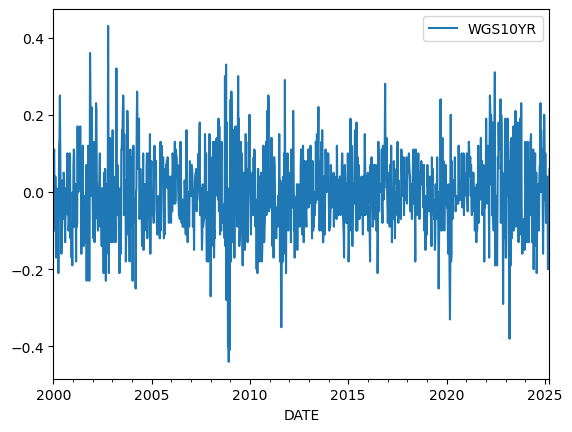

In [3]:
y.diff().plot()

In [4]:
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, power=2)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                       0.051
Mean Model:                        AR   Adj. R-squared:                  0.051
Vol Model:                      GARCH   Log-Likelihood:                1266.06
Distribution:                  Normal   AIC:                          -2522.12
Method:            Maximum Likelihood   BIC:                          -2496.21
                                        No. Observations:                 1315
Date:                Tue, Apr 01 2025   Df Residuals:                     1313
Time:                        10:09:23   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      2.3425e-05  2.397e-03  9.774e-03      0.992 [-4.674e-03,4.721e-03]
None[1]        0.2450  2.714e-02      9.027  1.760e-19      [  0.192,  0.298]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.8728e-04  8.212e-05      2.280  2.258e-02 [2.632e-05,3.482e-04]
alpha[1]       0.0757  1.635e-02      4.631  3.639e-06   [4.367e-02,  0.108]
beta[1]        0.9053  2.079e-02     43.542      0.000     [  0.865,  0.946]
============================================================================

Covariance estimator: robust
"""

In [5]:
#GJR-GARCH
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, o=1, power=2)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         AR - GJR-GARCH Model Results                         
==============================================================================
Dep. Variable:                   None   R-squared:                       0.051
Mean Model:                        AR   Adj. R-squared:                  0.051
Vol Model:                  GJR-GARCH   Log-Likelihood:                1268.45
Distribution:                  Normal   AIC:                          -2524.90
Method:            Maximum Likelihood   BIC:                          -2493.81
                                        No. Observations:                 1315
Date:                Tue, Apr 01 2025   Df Residuals:                     1313
Time:                        10:09:23   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -1.1800e-03  2.414e-03     -0.489      0.625 [-5.912e-03,3.552e-03]
None[1]         0.2444  2.707e-02      9.029  1.726e-19      [  0.191,  0.297]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.8150e-04  7.177e-05      2.529  1.144e-02  [4.084e-05,3.222e-04]
alpha[1]       0.0529  1.544e-02      3.424  6.171e-04  [2.261e-02,8.315e-02]
gamma[1]       0.0486  2.514e-02      1.934  5.313e-02 [-6.566e-04,9.790e-02]
beta[1]        0.9052  1.818e-02     49.797      0.000      [  0.870,  0.941]
=============================================================================

Covariance estimator: robust
"""

gamma > p-value (0.05). коэффициент не значим

In [8]:
forecaster = ARCH(mean='AR', lags=1, vol='EGARCH', p=1, q=1, o=1, power=2)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR - EGARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                       0.051
Mean Model:                        AR   Adj. R-squared:                  0.051
Vol Model:                     EGARCH   Log-Likelihood:                1268.62
Distribution:                  Normal   AIC:                          -2525.23
Method:            Maximum Likelihood   BIC:                          -2494.14
                                        No. Observations:                 1315
Date:                Tue, Apr 01 2025   Df Residuals:                     1313
Time:                        10:12:01   Df Model:                            2
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
Const      -9.8857e-04  2.405e-03     -0.411      0.681 [-5.702e-03,3.725e-03]
None[1]         0.2448  2.722e-02      8.993  2.396e-19      [  0.191,  0.298]
                               Volatility Model                               
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
omega         -0.1030  3.825e-02     -2.692  7.104e-03    [ -0.178,-2.800e-02]
alpha[1]       0.1598  2.787e-02      5.733  9.877e-09       [  0.105,  0.214]
gamma[1]      -0.0423  1.661e-02     -2.547  1.086e-02 [-7.488e-02,-9.758e-03]
beta[1]        0.9784  7.961e-03    122.904      0.000       [  0.963,  0.994]
==============================================================================

Covariance estimator: robust
"""

gamma < p-value (0.05). коэффициент значим

In [10]:
# зададим горизонт прогнозирования и частотность
fh = ForecastingHorizon(np.arange(1,6), freq ='W-Fri')

y_pred = forecaster.fit_predict(y=y, fh=fh)

y_pred

,WGS10YR
2025-04-04,4.324954
2025-04-11,4.319927
2025-04-18,4.314917
2025-04-25,4.309925
2025-05-02,4.304951


In [11]:
# прогноз волатильности
forecaster.predict_var(fh=fh)

2025-04-04    0.008134
2025-04-11    0.016405
2025-04-18    0.024407
2025-04-25    0.032383
2025-05-02    0.040826
Freq: W-FRI, dtype: float64